In [1]:
import numpy as np
from sympy import symbols, simplify
from sympy.functions.elementary.miscellaneous import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

# Caos cuántico: Análisis estadístico espectral y entrópico del coupled top model.

## 1. Cálculo del Hamiltoniano

\begin{equation}
\hat{\mathcal{H}}=-\hat{S}_{1 x}-\hat{S}_{2 x}-\frac{\mu}{S} \hat{S}_{1 z} \hat{S}_{2 z}
\end{equation}

\begin{equation}
H = -\frac{S_{1+}}{2}-\frac{S_{1-}}{2}-\frac{S_{2+}}{2}-\frac{S_{2-}}{2}+\frac{\mu}{S}\cdot S_{1z}\cdot S_{2z}
\end{equation}

 Para operar con matrices, fragmentaremos el hamiltoniano en sus cinco términos, que actúan independientemente sobre los estados. Al final, sumaremos las contribuciones.

In [2]:
def Hamilt(s,mu=symbols('mu')):

    def listas_m1_m2(s):
        '''
        Dados dos espines enteros s1 y s2, saca los posibles valores de z de 
        ambos (mz_1 y mz_2) y devuelve dos listas con tantas entradas
        como combinaciones de valores de de mz_1 y mz_2 haya. La primera lista 
        contiene los valores de mz_1 y la segunda los valores de mz_2, tal que 
        en cada posición k de ambas listas se encuentra una combinación de 
        m1_z (lista 1) y m2_z (lista 2) distinta.
        '''
        m1_values=[s - i for i in range(int(2*s + 1))]; m1_values
        m2_values=[s - i for i in range(int(2*s + 1))]; m2_values
        kets_couple=np.zeros(((((2*s)+1)*((2*s)+1)),2), dtype=float)
        k=0
        lista_m1= [0 for i in range(0, (((2*s)+1)*((2*s)+1)))]
        lista_m2= [0 for i in range(0, (((2*s)+1)*((2*s)+1)))]
        for j in m2_values:   
            for i in m1_values:
                lista_m1[k]=m1_values[m1_values.index(i)]
                lista_m2[k]=m2_values[m2_values.index(j)]
                kets_couple[k]=(m1_values[i], m2_values[j])
                k=k+1

        return lista_m1, lista_m2


    def array_S1p(s,listas_m1_m2):
        '''
        Dadas las listas de la primera función y un valor de espín, calcula la 
        matriz resultante de aplicar el operador S1_+ a a las distintas combinaciones
        de bras y kets. (El operador S1_+ solo afecta a la componente z del espín 1, m1).
        '''
        lista_m1_ket=listas_m1_m2[0]
        lista_m2_ket=listas_m1_m2[1]
        lista_m1_bra=listas_m1_m2[0]
        lista_m2_bra=listas_m1_m2[1]

        arraySp1=np.zeros(((((2*s)+1)*((2*s)+1)),(((2*s)+1)*((2*s)+1))), dtype=float)
        for i in range(0,len(lista_m1_bra)):
            for j in range(0,len(lista_m1_ket)):
                if (lista_m1_bra[i]==(lista_m1_ket[j]+1)):
                    if lista_m2_bra[i]==lista_m2_ket[j]:
                        arraySp1[i,j]=((sqrt((s*(s+1))-(lista_m1_ket[j]*(lista_m1_ket[j]+1)))))
                    else:
                        arraySp1[i,j]=0

                else:
                    arraySp1[i,j]=0
        return arraySp1
    
    

    def array_S1m(s,listas_m1_m2):
        '''
        Dadas las listas de la primera función y un valor de espín, calcula la 
        matriz resultante de aplicar el operador S1_- a a las distintas combinaciones
        de bras y kets. (El operador S1_- solo afecta a la componente z del espín 1, m1).
        '''
        lista_m1_ket=listas_m1_m2[0]
        lista_m2_ket=listas_m1_m2[1]
        lista_m1_bra=listas_m1_m2[0]
        lista_m2_bra=listas_m1_m2[1]

        arraySm1=np.zeros(((((2*s)+1)*((2*s)+1)),(((2*s)+1)*((2*s)+1))), dtype=float)
        for i in range(0,len(lista_m1_bra)):
            for j in range(0,len(lista_m1_ket)):
                if (lista_m1_bra[i]==(lista_m1_ket[j]-1)):
                    if lista_m2_bra[i]==lista_m2_ket[j]:
                        arraySm1[i,j]=((sqrt((s*(s+1))-(lista_m1_ket[j]*(lista_m1_ket[j]-1)))))
                    else:
                        arraySm1[i,j]=0

                else:
                    arraySm1[i,j]=0
        return arraySm1

    
    

    def array_S2p(s,listas_m1_m2):
        '''
        Dadas las listas de la primera función y un valor de espín, calcula la 
        matriz resultante de aplicar el operador S2_+ a a las distintas combinaciones
        de bras y kets. (El operador S2_+ solo afecta a la componente z del espín 2, m2).
        '''
        lista_m1_ket=listas_m1_m2[0]
        lista_m2_ket=listas_m1_m2[1]
        lista_m1_bra=listas_m1_m2[0]
        lista_m2_bra=listas_m1_m2[1]

        arraySp2=np.zeros(((((2*s)+1)*((2*s)+1)),(((2*s)+1)*((2*s)+1))), dtype=float)
        for i in range(0,len(lista_m2_bra)):
            for j in range(0,len(lista_m2_ket)):
                if (lista_m2_bra[i]==(lista_m2_ket[j]+1)):
                    if lista_m1_bra[i]==lista_m1_ket[j]:
                        arraySp2[i,j]=((sqrt((s*(s+1))-(lista_m2_ket[j]*(lista_m2_ket[j]+1)))))
                    else:
                        arraySp2[i,j]=0

                else:
                    arraySp2[i,j]=0
        return arraySp2

    
    
    
    def array_S2m(s,listas_m1_m2):
        '''
        Dadas las listas de la primera función y un valor de espín, calcula la 
        matriz resultante de aplicar el operador S2_- a a las distintas combinaciones
        de bras y kets. (El operador S2_- solo afecta a la componente z del espín 1, m2).
        '''
        lista_m1_ket=listas_m1_m2[0]
        lista_m2_ket=listas_m1_m2[1]
        lista_m1_bra=listas_m1_m2[0]
        lista_m2_bra=listas_m1_m2[1]

        arraySm2=np.zeros(((((2*s)+1)*((2*s)+1)),(((2*s)+1)*((2*s)+1))), dtype=float)
        for i in range(0,len(lista_m2_bra)):
            for j in range(0,len(lista_m2_ket)):
                if (lista_m2_bra[i]==(lista_m2_ket[j]-1)):
                    if lista_m1_bra[i]==lista_m1_ket[j]:
                        arraySm2[i,j]=((sqrt((s*(s+1))-(lista_m2_ket[j]*(lista_m2_ket[j]-1)))))
                    else:
                        arraySm2[i,j]=0

                else:
                    arraySm2[i,j]=0
        return arraySm2

    
    
    
    def array_S1z(s,listas_m1_m2):
        '''
        Dadas las listas de la primera función y un valor de espín, calcula la 
        matriz resultante de aplicar el operador S1_z a a las distintas combinaciones
        de bras y kets. (El operador S1_z solo opera sobre el espín 1).
        '''
        lista_m1_ket=listas_m1_m2[0]
        lista_m2_ket=listas_m1_m2[1]
        lista_m1_bra=listas_m1_m2[0]
        lista_m2_bra=listas_m1_m2[1]

        arrayS1z=np.zeros(((((2*s)+1)*((2*s)+1)),(((2*s)+1)*((2*s)+1))), dtype=float)
        for i in range(0,len(lista_m1_bra)):
            for j in range(0,len(lista_m1_ket)):
                if (lista_m1_bra[i]==(lista_m1_ket[j])):
                    arrayS1z[i,j]=(lista_m1_ket[j])    
                else:
                    arrayS1z[i,j]=0
        return arrayS1z

    
    
    
    def array_S2z(s,listas_m1_m2):
        '''
        Dadas las listas de la primera función y un valor de espín, calcula la 
        matriz resultante de aplicar el operador S2_z a a las distintas combinaciones
        de bras y kets. (El operador S2_z solo opera sobre el espín 2).
        '''
        lista_m1_ket=listas_m1_m2[0]
        lista_m2_ket=listas_m1_m2[1]
        lista_m1_bra=listas_m1_m2[0]
        lista_m2_bra=listas_m1_m2[1]

        arrayS2z=np.zeros(((((2*s)+1)*((2*s)+1)),(((2*s)+1)*((2*s)+1))), dtype=float)
        for i in range(0,len(lista_m2_bra)):
            for j in range(0,len(lista_m2_ket)):
                if (lista_m2_bra[i]==(lista_m2_ket[j])):
                        arrayS2z[i,j]=(lista_m2_ket[j])
                else:
                    arrayS2z[i,j]=0
        return arrayS2z
    
    
    Hmn=-(array_S1p(s,listas_m1_m2(s))/2)-(array_S1m(s,listas_m1_m2(s))/2)-(array_S2p(s,listas_m1_m2(s))/2)-(array_S2m(s,listas_m1_m2(s))/2)+(mu/s)*((array_S1z(s,listas_m1_m2(s))*array_S2z(s,listas_m1_m2(s)))) 
    return Hmn

## 2. Estadístico $P_r$ 
(Distribution of ratio of consecutive levels)

El ratio de separación de niveles consecutivos (ratio of consecutive level spacing) r es una variable aleatoria que toma los siguientes valores:

\begin{equation}
r_{n} \equiv \frac{E_{n+1}-E_{n}}{E_{n}-E_{n-1}}, \quad \forall n \in\{2, \ldots, N-1\}
\end{equation}

donde $\left\{E_{n}\right\}_{n=1}^{N}$ es un conjunto completo de energías en orden ascendente, tal que $E_n \geq E_m$ si $n \geq m$.

El sistema que estamos analizando tiene dos simetrías discretas. Cada una de ellas tiene un operador asignado. Los estados $|m1,m2\rangle$ son autoestados de dichos operadores con autovalor 1 o -1 para ambos. Por lo tanto, los estados energéticos del sistema tienen dos números cuánticos más con los que no estábamos contando. Para calcular el ratio $r_n$, es necesario separar las energías en cuatro grupos, cada uno con una combinación concreta de los números cuánticos mencionados.

- Operador $\hat\Pi$ (relacionado con la simetría bajo rotación de 180º de la componente z de ambos espines)
- Operador $\hat P$ (relacionado con la simetría bajo intercambio del espín 1 por el espín 2 y viceversa)

### $\hat\Pi=(-1)^{\hat S_{x1}+\hat S_{x2}}=(-1)^{\hat S_x}$

1) Construimos $S_x$ y la diagonalizamos: $S_{x, diag}=P^T\hat S_X P$ $\rightarrow$, 
(P es una matriz cuyas columnas son los autovectores de $S_x$).

2) Creamos la matriz del operador $\Pi$ diagonal, elvando (-1) a los autovalores de $S_x$.

3) Deshacemos el cambio de base: $\hat\Pi=P\Pi_{diag}P^T$

In [3]:
# 1

def Sx(s, mu):  
    
    def listas_m1_m2(s):
        '''
        Dados dos espines enteros s1 y s2, saca los posibles valores de z de 
        ambos (mz_1 y mz_2) y devuelve dos listas con tantas entradas
        como combinaciones de valores de de mz_1 y mz_2 haya. La primera lista 
        contiene los valores de mz_1 y la segunda los valores de mz_2, tal que 
        en cada posición k de ambas listas se encuentra una combinación de 
        m1_z (lista 1) y m2_z (lista 2) distinta.
        '''
        m1_values=[s - i for i in range(int(2*s + 1))]; m1_values
        m2_values=[s - i for i in range(int(2*s + 1))]; m2_values
        kets_couple=np.zeros(((((2*s)+1)*((2*s)+1)),2), dtype=float)
        k=0
        lista_m1= [0 for i in range(0, (((2*s)+1)*((2*s)+1)))]
        lista_m2= [0 for i in range(0, (((2*s)+1)*((2*s)+1)))]
        for j in m2_values:   
            for i in m1_values:
                lista_m1[k]=m1_values[m1_values.index(i)]
                lista_m2[k]=m2_values[m2_values.index(j)]
                kets_couple[k]=(m1_values[i], m2_values[j])
                k=k+1

        return lista_m1, lista_m2
    

    
    def array_S1p(s,listas_m1_m2):
        '''
        Dadas las listas de la primera función y un valor de espín, calcula la 
        matriz resultante de aplicar el operador S1_+ a a las distintas combinaciones
        de bras y kets. (El operador S1_+ solo afecta a la componente z del espín 1, m1).
        '''
        lista_m1_ket=listas_m1_m2[0]
        lista_m2_ket=listas_m1_m2[1]
        lista_m1_bra=listas_m1_m2[0]
        lista_m2_bra=listas_m1_m2[1]

        arraySp1=np.zeros(((((2*s)+1)*((2*s)+1)),(((2*s)+1)*((2*s)+1))), dtype=float)
        for i in range(0,len(lista_m1_bra)):
            for j in range(0,len(lista_m1_ket)):
                if (lista_m1_bra[i]==(lista_m1_ket[j]+1)):
                    if lista_m2_bra[i]==lista_m2_ket[j]:
                        arraySp1[i,j]=((sqrt((s*(s+1))-(lista_m1_ket[j]*(lista_m1_ket[j]+1)))))
                    else:
                        arraySp1[i,j]=0

                else:
                    arraySp1[i,j]=0
        return arraySp1


    def array_S1m(s,listas_m1_m2):
        '''
        Dadas las listas de la primera función y un valor de espín, calcula la 
        matriz resultante de aplicar el operador S1_- a a las distintas combinaciones
        de bras y kets. (El operador S1_- solo afecta a la componente z del espín 1, m1).
        '''
        lista_m1_ket=listas_m1_m2[0]
        lista_m2_ket=listas_m1_m2[1]
        lista_m1_bra=listas_m1_m2[0]
        lista_m2_bra=listas_m1_m2[1]

        arraySm1=np.zeros(((((2*s)+1)*((2*s)+1)),(((2*s)+1)*((2*s)+1))), dtype=float)
        for i in range(0,len(lista_m1_bra)):
            for j in range(0,len(lista_m1_ket)):
                if (lista_m1_bra[i]==(lista_m1_ket[j]-1)):
                    if lista_m2_bra[i]==lista_m2_ket[j]:
                        arraySm1[i,j]=((sqrt((s*(s+1))-(lista_m1_ket[j]*(lista_m1_ket[j]-1)))))
                    else:
                        arraySm1[i,j]=0

                else:
                    arraySm1[i,j]=0
        return arraySm1

    
    def array_S2p(s,listas_m1_m2):
        '''
        Dadas las listas de la primera función y un valor de espín, calcula la 
        matriz resultante de aplicar el operador S2_+ a a las distintas combinaciones
        de bras y kets. (El operador S2_+ solo afecta a la componente z del espín 2, m2).
        '''
        lista_m1_ket=listas_m1_m2[0]
        lista_m2_ket=listas_m1_m2[1]
        lista_m1_bra=listas_m1_m2[0]
        lista_m2_bra=listas_m1_m2[1]

        arraySp2=np.zeros(((((2*s)+1)*((2*s)+1)),(((2*s)+1)*((2*s)+1))), dtype=float)
        for i in range(0,len(lista_m2_bra)):
            for j in range(0,len(lista_m2_ket)):
                if (lista_m2_bra[i]==(lista_m2_ket[j]+1)):
                    if lista_m1_bra[i]==lista_m1_ket[j]:
                        arraySp2[i,j]=((sqrt((s*(s+1))-(lista_m2_ket[j]*(lista_m2_ket[j]+1)))))
                    else:
                        arraySp2[i,j]=0

                else:
                    arraySp2[i,j]=0
        return arraySp2

    
    
    def array_S2m(s,listas_m1_m2):
        '''
        Dadas las listas de la primera función y un valor de espín, calcula la 
        matriz resultante de aplicar el operador S2_- a a las distintas combinaciones
        de bras y kets. (El operador S2_- solo afecta a la componente z del espín 1, m2).
        '''
        lista_m1_ket=listas_m1_m2[0]
        lista_m2_ket=listas_m1_m2[1]
        lista_m1_bra=listas_m1_m2[0]
        lista_m2_bra=listas_m1_m2[1]

        arraySm2=np.zeros(((((2*s)+1)*((2*s)+1)),(((2*s)+1)*((2*s)+1))), dtype=float)
        for i in range(0,len(lista_m2_bra)):
            for j in range(0,len(lista_m2_ket)):
                if (lista_m2_bra[i]==(lista_m2_ket[j]-1)):
                    if lista_m1_bra[i]==lista_m1_ket[j]:
                        arraySm2[i,j]=((sqrt((s*(s+1))-(lista_m2_ket[j]*(lista_m2_ket[j]-1)))))
                    else:
                        arraySm2[i,j]=0

                else:
                    arraySm2[i,j]=0
        return arraySm2

    Sx=(array_S1p(s,listas_m1_m2(s))/2)+(array_S1m(s,listas_m1_m2(s))/2)+(array_S2p(s,listas_m1_m2(s))/2)+(array_S2m(s,listas_m1_m2(s))/2)
    return Sx

In [4]:
#2 y #3
def Energias_segun_Pi(s,mu):
    
    #Construimos la matriz \Pi_{diag}: primero diagonalizando Sx y luego elevando (-1) a la potencia de los elementos de la 
    #diagonal (autovalores). 
    from numpy.linalg import eigh
    va_Sx,ve_Sx=eigh(Sx(s,mu))

    #Elementos diagonales de \Pi_diag
    pi_elem_diag=(-1)**va_Sx.round(5) 

    #Pi diagonal
    Pi_diag=np.zeros((((2*s+1)**2),((2*s+1)**2)))
    for i in range((2*s+1)**2):
        Pi_diag[i,i]=pi_elem_diag[i]

    #Pi en base m1m2
    Pi=(np.dot(np.dot(ve_Sx,Pi_diag),ve_Sx.transpose())).round(5)

    #Creamos dos listas, una en la que meteremos las energías con valor esperado de Pi +1 y otra con valor esperado de Pi -1.
    pi_p1=list()
    pi_m1=list()
    for i in range((2*s+1)**2):
        valor_esp_pi=np.dot(np.dot(ve_Sx[i].transpose(),Pi),ve_Sx[i]).round(4)
        if valor_esp_pi==1:
            pi_p1.append(va_Sx[i].round(5))
        elif valor_esp_pi==-1:
            pi_m1.append(va_Sx[i].round(5))
    
    # Creamos también 2 listas con los índices de las energías con cada autovalor de Pi, que nos será más útil
    pi_p1_2=list()
    pi_m1_2=list()
    
    va_H,ve_H=eigh(Hamilt(s,mu))
    
    for i in range((2*s+1)**2):
        valor_esp_pi_2=np.dot(np.dot(ve_H.transpose()[i], Pi), ve_H.transpose()[i]).round(4)
        if valor_esp_pi_2==1:
            pi_p1_2.append(i)
        elif valor_esp_pi_2==-1:
            pi_m1_2.append(i)
    return pi_p1_2, pi_m1_2

### $\hat P$:
\begin{equation}
    \hat P|m_1,m_2\rangle=\pm|m_1,m_2\rangle
\end{equation}

Veamos en qué ocasiones se cumple cada caso.

Siendo $|\Psi_n\rangle$ un autoestado cualquiera $|\Psi_n\rangle=\sum_{m_1,m_2}C_{m_1,m_2}|m_1,m_2\rangle$,

- $\hat P|m_1,m_2\rangle=|m_1,m_2\rangle$ $\rightarrow$ $C_{m_1,m_2}=C_{m_2,m_1} \forall m_1,m_2$

- $\hat P|m_1,m_2\rangle=-|m_1,m_2\rangle$ $\rightarrow$ $C_{m_1,m_2}=-C_{m_2,m_1} \forall m_1,m_2$

Para separar las energías en aquellas con valor +1 y las de valor -1 de $P$, usaremos la condición de completitud de los autovectores del hamiltoniano:

Dado un autovector $|\Psi_n\rangle=\sum_{m_1,m_2}C_{m_1,m_2}|m_1,m_2\rangle$, se debe cumplir que $\sum_{m_1,m_2}C_{m_1,m_2}^2=1$. 

Definiremos una nueva variable $X$: 

\begin{equation}
X=\sum_{m_{1} m_{2}} C_{m_{1} m_{2}} C_{m_{2} m_{1}}= \begin{cases}+1 & \text { si } \hat{P}=1 \\ -1 & \text { si } \hat{P}=-1\end{cases}
\end{equation}

In [5]:
def listas_m1_m2(s):
        '''
        Dados dos espines enteros s1 y s2, saca los posibles valores de z de 
        ambos (mz_1 y mz_2) y devuelve dos listas con tantas entradas
        como combinaciones de valores de de mz_1 y mz_2 haya. La primera lista 
        contiene los valores de mz_1 y la segunda los valores de mz_2, tal que 
        en cada posición k de ambas listas se encuentra una combinación de 
        m1_z (lista 1) y m2_z (lista 2) distinta.
        '''
        m1_values=[s - i for i in range(int(2*s + 1))]; m1_values
        m2_values=[s - i for i in range(int(2*s + 1))]; m2_values
        kets_couple=np.zeros(((((2*s)+1)*((2*s)+1)),2), dtype=float)
        k=0
        lista_m1= [0 for i in range(0, (((2*s)+1)*((2*s)+1)))]
        lista_m2= [0 for i in range(0, (((2*s)+1)*((2*s)+1)))]
        for j in m2_values:   
            for i in m1_values:
                lista_m1[k]=m1_values[m1_values.index(i)]
                lista_m2[k]=m2_values[m2_values.index(j)]
                kets_couple[k]=(m1_values[i], m2_values[j])
                k=k+1

        return lista_m1, lista_m2

In [6]:
def X(s, mu):
    X_vec=np.zeros((2*s+1)**2)
    for v in range((2*s+1)**2):
        
        lista_m1=listas_m1_m2(s)[0]
        lista_m2=listas_m1_m2(s)[1]

        va_H,ve_H=eigh(Hamilt(s,mu))

        X_suma=0

        for i in range ((2*s+1)**2):
            for j in range ((2*s+1)**2):
                if lista_m1[i]==lista_m2[j] and lista_m2[i]==lista_m1[j]:

                    X=ve_H.transpose()[v][i]*ve_H.transpose()[v][j]
                    X_suma=X_suma+X
                else:
                    X_suma=X_suma
        X_vec[v]=X_suma
    return X_vec

In [7]:
def Energias_segun_P(s,mu):
    X_vec=X(s,mu)
    
    #Creamos dos listas, una en la que meteremos las energías correspondientes al autovalor de P +1 y otra con P -1.
    P_p1=list()
    P_m1=list()
    
    va_H,ve_H=eigh(Hamilt(s,mu))
        
    for i in range((2*s+1)**2):
        if X_vec[i].round(2)==1:
            P_p1.append(va_H[i].round(5))
        elif X_vec[i].round(2)==-1:
            P_m1.append(va_H[i].round(5))

    # Creamos también 2 listas con los índices de las energías con cada autovalor de P, que nos será más útil
    P_p1_2=list()
    P_m1_2=list()
    for i in range((2*s+1)**2):

        if X_vec[i].round(2)==1:

            P_p1_2.append(i)
        elif X_vec[i].round(2)==(-1):

            P_m1_2.append(i)

    return P_p1_2, P_m1_2

In [8]:
def Energias_separadas(s,mu):
    E_Pi=Energias_segun_Pi(s,mu)
    E_P=Energias_segun_P(s,mu)
    
    E_p1p1=list()
    E_p1m1=list()
    E_m1p1=list()
    E_m1m1=list()
    
    va_H,ve_H=eigh(Hamilt(s,mu))

    for valor in E_Pi[0]:
        for valor2 in E_P[0]:
            if valor==valor2:
                E_p1p1.append(va_H[valor])

    for valor in E_Pi[0]:
        for valor2 in E_P[1]:
            if valor==valor2:
                E_p1m1.append(va_H[valor])

    for valor in E_Pi[1]:
        for valor2 in E_P[0]:
            if valor==valor2:
                E_m1p1.append(va_H[valor])

    for valor in E_Pi[1]:
        for valor2 in E_P[1]:
            if valor==valor2:
                E_m1m1.append(va_H[valor])

    return E_p1p1, E_p1m1, E_m1p1, E_m1m1

In [9]:
def Energias_separadas2(s,mu):
    E_Pi=Energias_segun_Pi(s,mu)
    E_P=Energias_segun_P(s,mu)
    
    E_p1p1=list()
    E_p1m1=list()
    E_m1p1=list()
    E_m1m1=list()
    
    va_H,ve_H=eigh(Hamilt(s,mu))

    for valor in E_Pi[0]:
        for valor2 in E_P[0]:
            if valor==valor2:
                E_p1p1.append(valor+1)

    for valor in E_Pi[0]:
        for valor2 in E_P[1]:
            if valor==valor2:
                E_p1m1.append(valor+1)

    for valor in E_Pi[1]:
        for valor2 in E_P[0]:
            if valor==valor2:
                E_m1p1.append(valor+1)

    for valor in E_Pi[1]:
        for valor2 in E_P[1]:
            if valor==valor2:
                E_m1m1.append(valor+1)

    return E_p1p1, E_p1m1, E_m1p1, E_m1m1

In [10]:
import sympy
from numpy.linalg import eigh
import pandas as pd

def r(s, mu):
    '''
    #1. Diagonalizamos el Hamiltoniano. Los autovalores constituyen el espectro de energías. 
        Las energías vienen ordenadas de menor a mayor.
    #2. Quitamos valores repetidos en array de energías.
    #3. Creo una lista vacía donde, con un loop, voy introduciendo los valores rn del estadistico
    '''
    E_sep=Energias_separadas(s,mu)
    r_estad=list()
    for j in range(4):
        E=E_sep[j]
        for i in range(1,len(E)-1):
            r_i=(E[i+1]-E[i])/(E[i]-E[i-1])
            r_estad.append(r_i)
    r_dic= { '$r_n$' : r_estad }
    tab_r=pd.DataFrame(data=r_dic, index=list(range(1,len(r_estad)+1)))
    tab_r.index.name='n'
    
    return tab_r

In [11]:
def f1(x):
    return 1/(1+x)**2
def f2(x):
    return (27/8)*((x+x**2)/((1+x+x**2)**(5/2)))
def hist_r(r_data):
    fig,ax = plt.subplots(figsize=(8,6)) 
    ax.hist( r_data['$r_n$'].values, align='mid', bins =np.linspace(0, 4, num=32), density=True, width=0.1, color='skyblue') 
    x = np.linspace(0, 4, num=100)
    ax.plot(x, [f1(i) for i in x], color='red', label='Poisson')
    ax.plot(x, [f2(i) for i in x], color='green', label='GOE')
    
    ax.set_ylabel("P(r)")
    ax.set_xlabel("r")
    ax.legend(loc=1, fontsize=13);

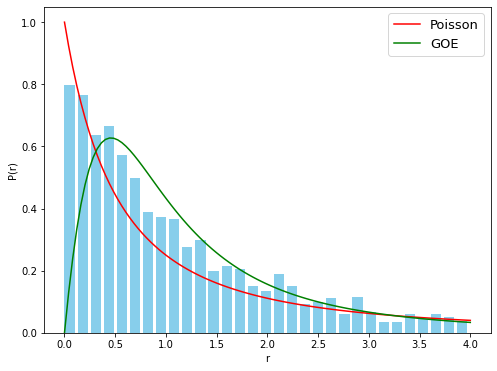

In [12]:
hist_r(r(20,1))

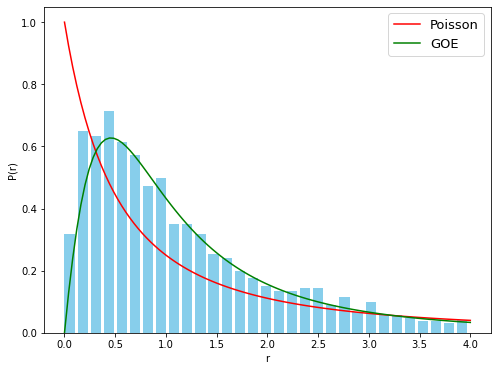

In [13]:
hist_r(r(20,1.85))

## 3. Entropía de entrelazamiento


Dado un autovector cualquiera $|\lambda_i>$ del Hamiltoniano del sistema, tal que $H |\lambda_i>=E_i|\lambda_i>$, este se podría descomponer por el teorema de Schmidt de la siguiente forma:

\begin{equation}
|\lambda_i>=\sum_{n,m}C^{(i)}_{m,n}|m,n>
\end{equation}

la matriz densidad correspondiente a dicho autovector se obtendría de a siguiente manera:

\begin{equation}
\rho_i=|\lambda_i><\lambda_i|=\sum_{n,m,k,l}C^{*(i)}_{k,l}C^{(i)}_{m,n}|m,n><k,l|
\end{equation}

La matriz densidad reducida para cada uno de los subespacios:

\begin{equation}
\rho_{1}^{(i)}=Tr_2(\rho_i)=\sum_{j} <j|\rho_i|j>_2
\end{equation}

\begin{equation}
\rho_{2}^{(i)}=Tr_1(\rho_i)=\sum_{j} <j|\rho_i|j>_1
\end{equation}




Elemento $m_1, m_1`$ de la matriz densidad reducida $\rho_1$:

\begin{equation}
    \rho_{1, m_1 m_1'}^{(i)}=\sum_{m_2} C_{m_1' m_2}^{* (i)} C_{m_1 m_2}^{(i)} 
\end{equation}

In [12]:
from numpy.linalg import eigh

def EE(s,mu):
    
    autoval, autovec=eigh(Hamilt(s,mu))

    m1_values=np.array([s - i for i in range(int(2*s + 1))]); m1_values
    m2_values=np.array([s - i for i in range(int(2*s + 1))]); m2_values
    
    SA=np.zeros(((2*s+1)**2))
    for v in range (0,(2*s+1)**2):
        #Matriz 3*3 cada filas=valores fijos de m1, columnas=valores de m2. Cada fila continene los coeficientes para el autovec i de
        #las distintas combinaciones m1m2 para un m1 fijo
        matriz_m1_v=np.zeros((2*s+1,2*s+1))
        for i in range (0,2*s+1):
            for k in range (0,2*s+1):
                a=autovec.transpose()[v][i+k*(2*s+1)]
                matriz_m1_v[i,k]=a

        #Matriz densidad reducida del subsistema 1 (traza sobre 2)
        A_v=np.zeros((2*s+1,2*s+1))
        for j in range (2*s+1):
            for l in range (2*s+1):
                A_v[j,l]=np.sum(matriz_m1_v[j]*matriz_m1_v[l])

        vaA_v,veA_v=eigh(A_v)

        k=0
        sA_v=np.zeros(2*s+1)
        for autoval in np.round(vaA_v,10):
            if autoval==0:
                sA_v[k]=0
            else:
                sA_v[k]=autoval*np.log(autoval)
            k=k+1
        SA_v=-np.sum(sA_v)

        SA[v]=SA_v
    return SA

In [13]:
import pandas as pd
#Creamos un dataframe cuyos índices (i) indiquen el número correspondiente a cada valor de energía 
#(tomando el nivel fundamental, el de energía menor, con i=1, y con i creciente para los valores excitados en orden).

def df_entropia(s,mu):
    entr = { 'S1' : EE(s,mu)}
    tab_entr = pd.DataFrame( data = entr, index=list(range(1, int((2*s+1)**2+1))))
    tab_entr.index.name='Nivel de energía'
    tab_entr.columns.name = 'Entropía de entrelazamiento'
    return tab_entr

In [17]:
import matplotlib.pyplot as plt
# Comparar entropía para distintos valores de mu con un mismo valor de espín

def graf_comparar_mu(s, mu1, mu2, mu3):
    
    entr = { 'S1_1' : EE(s,mu1), 'S1_2': EE(s, mu2), 'S1_3': EE(s, mu3)}
    tab_entr = pd.DataFrame( data = entr, index=list(range(1, int((2*s+1)**2+1))))
    tab_entr.index.name='Nivel de energía'
    tab_entr.columns.name = 'Entropía de entrelazamiento'
    '''
    Esta función toma un data frame del estilo que aporta la función 'df_entropia(s,mu)' y devuelve una gráfica
    que representa las entropías los dos subsistemas de espín en función del nivel de energía para distintos 
    valores de la constante acoplamiento ferromagnético.
    '''
    fig,ax = plt.subplots(figsize=(6,4)) 
    ax.plot(tab_entr.index.values, tab_entr['S1_1'].values, label=('mu=', mu1))
    ax.plot(tab_entr.index.values, tab_entr['S1_2'].values, label=('mu=', mu2))
    ax.plot(tab_entr.index.values, tab_entr['S1_3'].values, label=('mu=', mu3))
    fig.suptitle("Entropía de entrelazamiento en función del estado energético \n para los subsistemas de espín")
    ax.set_ylabel("Entropía de entrelazamiento")
    ax.set_xlabel("Nivel de energía")
    ax.legend(loc=3)
    fig;

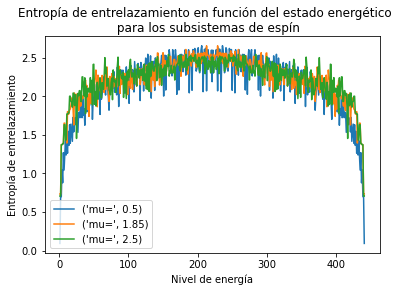

In [18]:
graf_comparar_mu(10,0.5,1.85,2.5)